<a href="https://colab.research.google.com/github/ccarpenterg/LearningTensorFlow2.0/blob/master/Gettingstarted_TensorFlow2_0_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIFAR-10: A More Challenging Dataset for CNNs



In [0]:
!pip install tensorflow==2.0.0-alpha0

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

print(tf.__version__)

2.0.0-alpha0


In [3]:
cifar10 = datasets.cifar10

(cifar10x_train, cifar10y_train), (cifar10x_test, cifar10y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


In [4]:
print(cifar10x_train.shape)
print(cifar10y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
print(cifar10x_test.shape)
print(cifar10y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(cifar10x_train,
                    cifar10y_train,
                    epochs=30,
                    validation_data=(cifar10x_test, cifar10y_test))

We get a training accuracy of 87.51% vs a validation accuracy of 63.59%, and a training loss of 0.3751 vs a validation loss of 1.9839. So even though, our training accuracy is acceptable for our very basic model, we are definitely in the presence of overfitting.

In [0]:
history_dict = history.history

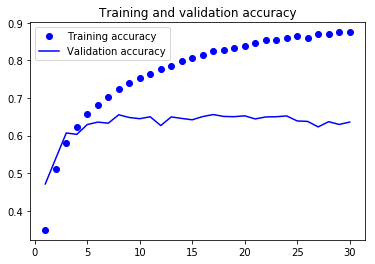

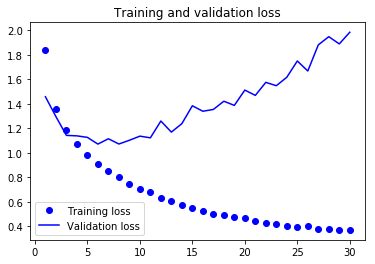

In [10]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Moreover, if we take a look at the accuracy and loss plots, we can see that the validation loss is increasing, and that the gap between the training and validation accuracy is increasing too. We conclude at this point, that increasing the number of epochs will not help us to solve the overfitting.